# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(참조)

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.
* 활용하지 않는 변수를 index 화 해주세요.

In [2]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# 한글 세팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [4]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [8]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.
data.head(5)

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [10]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.
data.tail(5)

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [12]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)
data.shape

(12000, 21)

In [14]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [16]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자
data.describe()

,CID,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,6000.50000,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,3464.24595,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.00000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3000.75000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,6000.50000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,9000.25000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,12000.00000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [18]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 crosstab을 통해서 탐색해 보자!

In [37]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [39]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.
# 40대 다음으로 많은 비유을 차지하는 연령대는 50대임을 알 수있다.
#아무래도 보험회사이다 보니 젊은 20대부터 보험가입을 시작해 지금까지 유지해온 4-50대 고객이 제일 많을것을 알 수 있다.

C:\Users\User\AppData\Local\Temp\ipykernel_3300\438644407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AGE',data=data, palette='Set2')


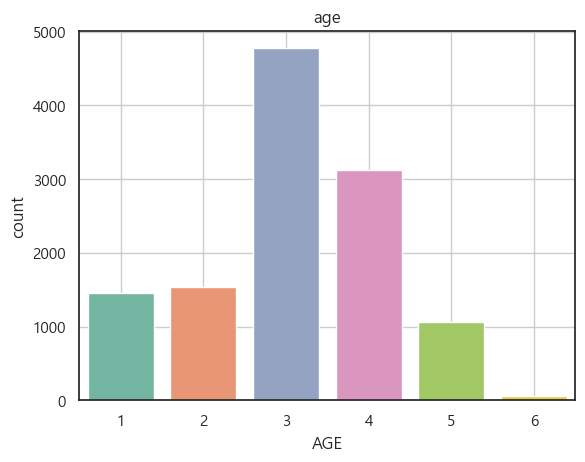

In [79]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data, palette='Set2')
plt.title('age')
plt.grid()
plt.show()

### 2) 고용상태

In [45]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.
data['고용상태'].value_counts(normalize = True).sort_index()  #데이터 빈도수대로 계산

고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64

In [47]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data['고용상태'].value_counts(normalize = True)*100

고용상태
고용       62.650000
무직       25.233333
휴직        9.116667
FALSE     3.000000
Name: proportion, dtype: float64

In [57]:
data['고용상태'].isna().sum()

0

In [ ]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?
# 비정규직? 장기간 휴가를 낸 사원? 협력업체?

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


In [ ]:
#비정규직? 장기간 휴가를 낸 직원? 협력업체? 프리랜서?

C:\Users\User\AppData\Local\Temp\ipykernel_3300\921993305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='고용상태',data=data, palette='Set3')


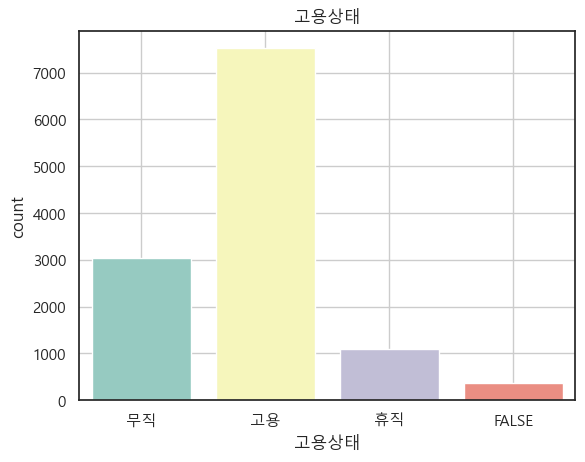

In [88]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='고용상태',data=data, palette='Set3')
plt.title('고용상태')
plt.grid()
plt.show()

### 3) 교육수준

In [63]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.
data['교육수준'].value_counts(normalize = True).sort_index()

교육수준
고졸이하    0.289750
대학졸업    0.592083
박사      0.036583
석사      0.081583
Name: proportion, dtype: float64

In [69]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.
data['교육수준'].value_counts(normalize = True)*100

교육수준
대학졸업    59.208333
고졸이하    28.975000
석사       8.158333
박사       3.658333
Name: proportion, dtype: float64

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
#회사 특성상 고객에게 보여지는 이미지가 중요하다보니 고졸이하보단 대학졸업과 그 이상의 학력이 많이 분포된것을 알 수 있다.
# 다른회사에 비해 석박사 비율은 낮은것 같다 추측해보자면 경영쪽 석박사 인력은 필요해보이지만 나머지 다른곳엔 수요가 없어 그런것 같다.

C:\Users\User\AppData\Local\Temp\ipykernel_3300\41166133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='교육수준',data=data, palette='Set3')


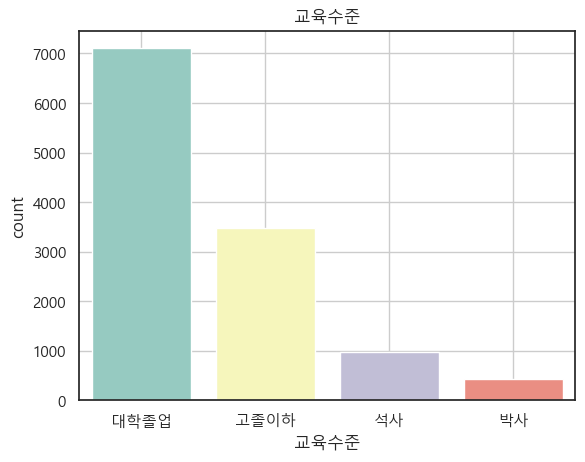

In [90]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='교육수준',data=data, palette='Set3')
plt.title('교육수준')
plt.grid()
plt.show()

### 4) 상품타입

In [92]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.
data['상품타입'].value_counts(normalize = True).sort_index()

상품타입
고급    0.089583
기본    0.606500
중급    0.303917
Name: proportion, dtype: float64

In [94]:
data['상품타입'].value_counts(normalize = True)*100

상품타입
기본    60.650000
중급    30.391667
고급     8.958333
Name: proportion, dtype: float64

<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
#보험료가 비싼 고급상품과 달리 비교적 가격이 싼 기본상품과 고급상품이 더 비율을 많이 차지하는것이 보여지고 있다.

C:\Users\User\AppData\Local\Temp\ipykernel_3300\2172295962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='상품타입',data=data, palette='Set3')


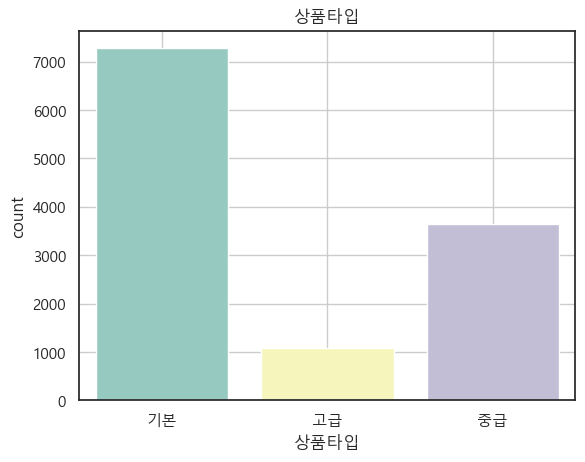

In [96]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='상품타입',data=data, palette='Set3')
plt.title('상품타입')
plt.grid()
plt.show()

### 5) 거주지사이즈

In [100]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.
data['거주지사이즈'].value_counts(normalize = True)*100

거주지사이즈
중    70.191667
소    19.433333
대    10.375000
Name: proportion, dtype: float64

<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
#거주지 사이즈(지역 고려 제외)는 곧 그 고객의 재산과도 연결될 수 있다. 즉 이 보험회사 상품의 가격과 연관성이 많은것 같다. 

C:\Users\User\AppData\Local\Temp\ipykernel_3300\2245510958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='거주지사이즈',data=data, palette='Set3')


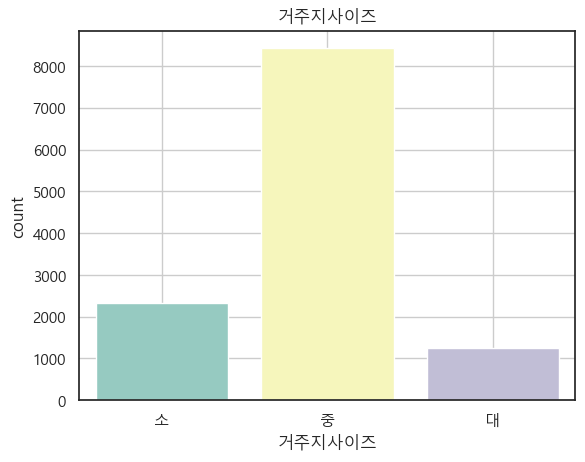

In [105]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='거주지사이즈',data=data, palette='Set3')
plt.title('거주지사이즈')
plt.grid()
plt.show()


### 6) 자동차

In [107]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.

data['자동차'].value_counts(normalize = True)*100

자동차
일반세단    50.616667
컴팩트카    20.700000
SUV     19.466667
스포츠카     5.433333
고급차      3.783333
Name: proportion, dtype: float64

<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [109]:
#고급차 비율은 일반 보험상품중 고급보험의 지분율에 비해 비교적 많이 낮다. 따라서 자동차보험을 판매할때 그 보험상품의 구성을 알차게 하는게 더욱더 도움될것 같다.

C:\Users\User\AppData\Local\Temp\ipykernel_3300\3986390659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='자동차',data=data, palette='Set3')


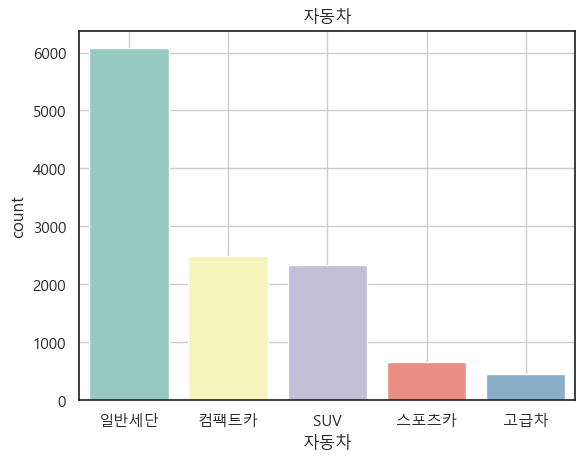

In [111]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x='자동차',data=data, palette='Set3')
plt.title('자동차')
plt.grid()
plt.show()



## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 crosstab, histplot 을 통해서 탐색해 보자

In [117]:
data['Willingness to pay/Stay']

0         2.616381
1         6.352530
2         4.974354
3        13.480284
4         9.776436
           ...    
11995    25.985100
11996     3.441000
11997     9.057600
11998     8.347200
11999     2.897100
Name: Willingness to pay/Stay, Length: 12000, dtype: float64

In [113]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)
data['Willingness to pay/Stay'].value_counts(normalize = True)*100

Willingness to pay/Stay
2.719500     0.300000
2.664000     0.291667
2.908200     0.283333
2.830500     0.275000
2.874900     0.275000
               ...   
31.845900    0.008333
13.910964    0.008333
49.728000    0.008333
6.137190     0.008333
25.985100    0.008333
Name: proportion, Length: 3024, dtype: float64

### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


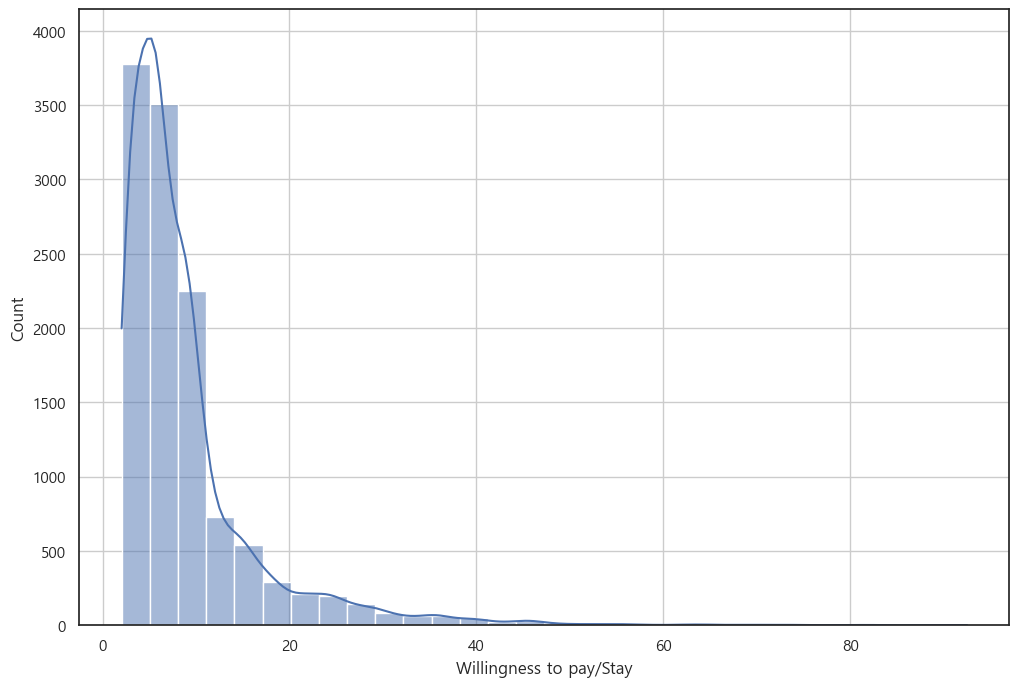

In [115]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

- bins는 막대개수 조정/ kde 는 커널밀도 추정(분포 곡선)

In [84]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
feature = 'Willingness to pay/Stay'
data[[feature]].describe().T

,count,mean,std,min,25%,50%,75%,max
Willingness to pay/Stay,12000.0,8.859478,7.698885,2.04573,4.3734,6.384831,9.8679,92.4963


<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

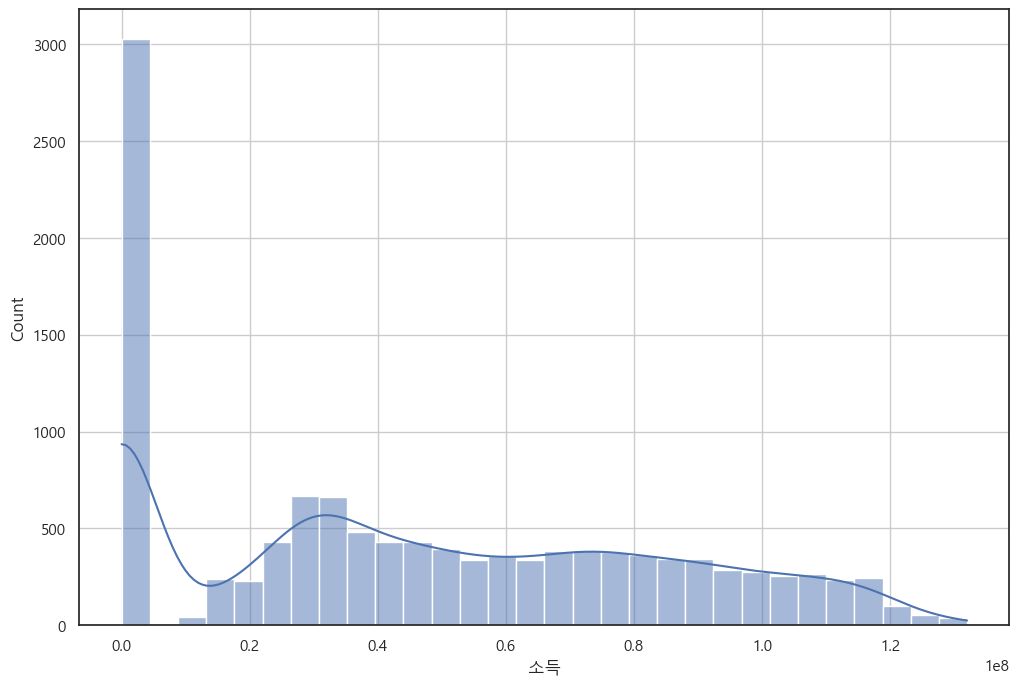

In [119]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['소득'],bins=30,kde=True)
plt.grid()
plt.show()

In [129]:
data['소득'].describe().T

count    1.200000e+04
mean     4.641737e+07
std      3.736221e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.186240e+07
75%      7.664150e+07
max      1.320209e+08
Name: 소득, dtype: float64

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
#소득은 보험유지기대지표에서 가장 중요한 영향을 끼칠수 있다고 생각한다. 그래서 고객의 소득비율을 고려해 보험상품도 역시 맞춤형으로 조정해야 한다 생각한다.

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

In [123]:
data['월 납입액']

0         80
1         80
2         60
3        110
4        120
        ... 
11995     70
11996     80
11997     90
11998    100
11999     80
Name: 월 납입액, Length: 12000, dtype: int64

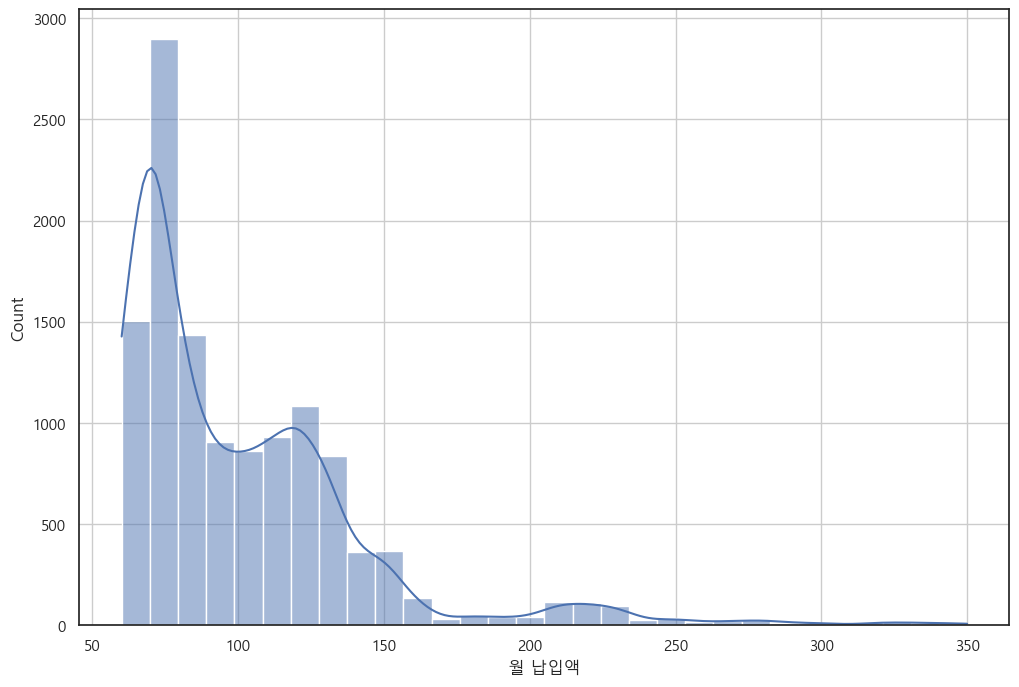

In [121]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['월 납입액'],bins=30,kde=True)
plt.grid()
plt.show()

In [125]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
data['월 납입액'].describe()

count    12000.000000
mean       100.065833
std         42.453750
min         60.000000
25%         70.000000
50%         90.000000
75%        120.000000
max        350.000000
Name: 월 납입액, dtype: float64

<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 월 납입액 평균을 조사해보면 월 평균 100달러이다. 하지만 빈도수를 보면 100달러미만인 70-80달러 사이가 제일 많은것을 알 수 있다. 고객들의 소득을 고려하여 상품을
# 만드는것이 가장 나은것 같다.  가성비 보험 

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 crosstab으로 데이터 확인해보기

In [140]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.
data['타 상품 보유 현황'].value_counts(normalize = True)*100

타 상품 보유 현황
1      35.691667
4이상    26.291667
2      25.141667
3      12.875000
Name: proportion, dtype: float64

<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
#보험회사별로 각 보험회사의 상품은 모두 다를 수 밖에 없다. 보유현황 비율을 보고 알 수 있는것은 A보험회사에는 없는 특성이 타회사 보험상품에 있어
#가입한것 일 수도 있다. 결론은 회사가 가지고 있는 보험상품을 타회사의 상품과 비교해보며 전문성이 떨어지는지 가격책정이 잘못되었는지 등 보완을 하면 보험회사의 상품도 
#더 많이 팔릴것이고 보험기대지표도 더 오를 것 같다.

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

In [146]:
data['총지불금액']

0         631000
1          54000
2         362000
3        1264000
4         947000
          ...   
11995     245000
11996     468000
11997     977000
11998     854000
11999     456000
Name: 총지불금액, Length: 12000, dtype: int64

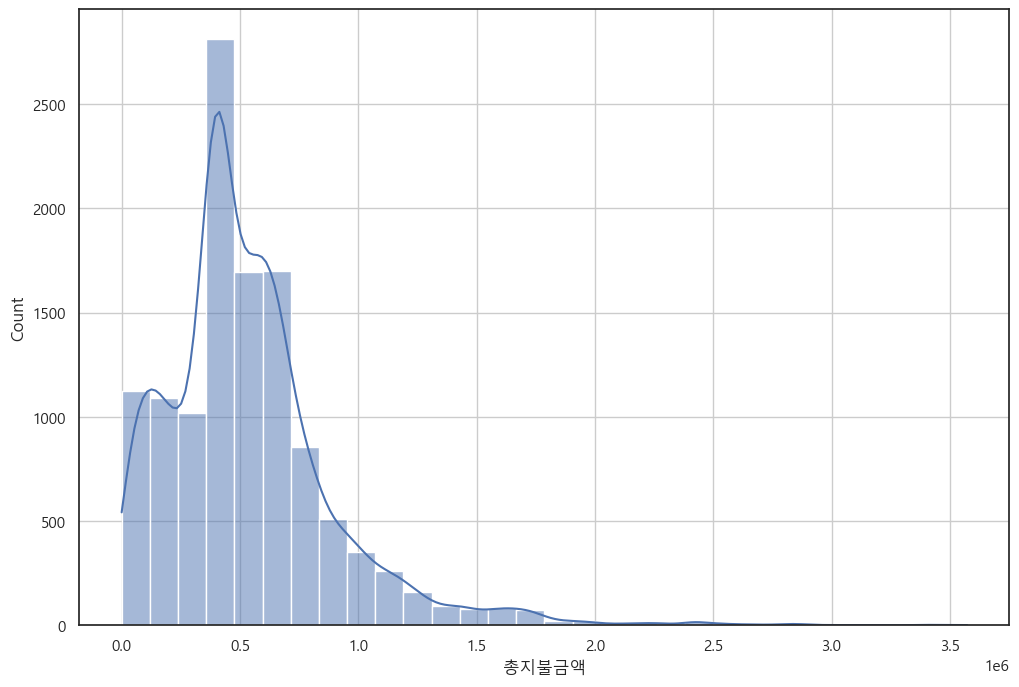

In [144]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize=(12,8))
sns.histplot(data['총지불금액'],bins=30,kde=True)
plt.grid()
plt.show()

In [152]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)
data['총지불금액'].describe()

count    1.200000e+04
mean     5.355854e+05
std      3.587993e+05
min      0.000000e+00
25%      3.360000e+05
50%      4.740000e+05
75%      6.790000e+05
max      3.573000e+06
Name: 총지불금액, dtype: float64

<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
#총 지불금액이 높다는 것은 그동안 고객이 보험을 해지하지 않고 꾸준히 가입을 해주어서 그런것이라고 볼 수 있다는건데 즉, 보험유지기대지표(WTP)가 높다는것으로 볼 수 있다.
#그렇다면 고객이 보험상품을 해지하지 않고 꾸준히 유지할수 있도록 노력해야한다 ex> 상품 몇개월 이상 유지시 소정의 상품 제공, 보험료 할인등  특정 상품 가입시 부가서비스 무료 이용

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!

추가